## [ 지도 학습]
---
- `지도 학습(supervised learning)` : 
    - 주어진 입력으로부터 출력을 예측하고자 할 때 사용한다.
    - 입력/출력 샘플 데이터, 즉 훈련 세트로부터 머신러닝 모델을 만든다.
    - 종종 훈련 데이터를 만드는 데 사람의 노력이 필요하지만 자동화하면 힘들고 어려운 작업의 속도를 높일 수 있다.

---
### [ 1. 분류와 회귀 ]
- `분류(classification)` : 미리 정의된, 가능성 있는 여러 `클래스 레이블(class label)`중 하나를 예측하는 것
    - `이진 분류(binary classification)` : 두개의 클래스로 분류 (ex. yes/no)
        - `양성(positive)` 클래스 : 학습하고자하는 대상 (ex. 스팸메일입니까? -> 스팸메일 클래스 = 양성)
        - `음성(negative)` 클래스 : 나머지 
    - `다중 분류(multiclass classification)` : 셋 이상의 클래스로 분류 (ex. 붓꽃, 웹사이트의 언어 예측)
    
    
- `회귀(regression)` : 연속적인 숫자, 또는 `부동소수점수(실수)`를 예측하는 것 
    - ex1. 어떤 사람의 교육 수준,나이,주거지로 연간 소득(숫자,양) 예측
    - ex2. 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수등으로 올해 수확량(숫자)을 예측
    - 예상 출력 값 사이에 연속성이 있다면 회귀 문제에 해당한다.

---
### [ 2. 일반화, 과대적합, 과소적합 ]

#### (1) 일반화, 과대적합, 과소적합

> 지도학습에서 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면  
> 처음 보는 새로운 데이터가 주어져도 정확히 예측할 거라 기대한다.

- `일반화(generalization)` : 
    - 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있는 경우,   
이를 훈련 세트에서 테스트세트로 일반화되었다고 한다.

> 모델을 복잡하게 할수록 훈련 데이터에 대해서는 더 정확히 예측할 수 있다.  
> 그러나 너무 복잡해지면 훈련 세트의 각 데이터 포인트에 너무 민감해져 새로운 데이터에 잘 일반화되지 못한다!
>  
> ☑ 찾아야 하는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.

- `과대적합(overfitting)` :
    - 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것
    - 모델이 훈련 세트의 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어난다.
- `과소적합(underfitting)` :
    - 과대적합과 반대로 너무 간단한 모델이 선택되는 것
    

<img src="attachment:image.png" alt="drawing" width="400"/>

#### (2) 모델 복잡도와 데이터셋 크기의 관계

- `모델 복잡도`는 훈련 데이터셋에 담긴 `입력 데이터의 다양성`과 관련이 깊다.
    - 데이터셋에 다양한 데이터 포인트 多 -> 과대적합이 없는 더 복잡도 있는 모델 만들 가능성 up  
    ( 테스트 샘플에서도 예측을 잘하며 모델이 좀더 세밀해진다는 의미)
    - But, 같은 데이터 포인트를 중복하거나 매우 비슷한 데이터를 모으는 것은 도움x

---
### [ 3. 지도 학습 알고리즘 ]
#### (1) 예제에 사용할 데이터셋
#### (1-1) `forge` 데이터셋
- 두 개의 특성을 가진 `forge` 데이터셋은 인위적으로 만든 이진 분류 데이터셋이다.

X.shape (26, 2)


C:\Users\jhryu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


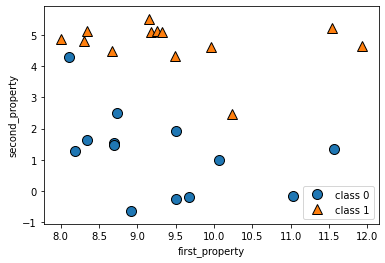

In [36]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

# 데이터셋을 만든다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그린다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #  X는 데이터값 y는 데이터레이블을 의미함
plt.legend(['class 0','class 1'], loc = 4)    # loc옵션은 legend의 위치를 나타낸다.
plt.xlabel('first_property')
plt.ylabel('second_property')

print('X.shape', X.shape)

# 발생하는 오류는 mglearn을 제작하신 분이 무시해도 상관없다고함...

> `X.shape`값에서 알 수 있듯이 이 데이터셋은 데이터 포인트 26개와 특성 2개를 가진다.

#### (1-2) `wave` 데이터셋
- 회귀 알고리즘 설명에는 인위적으로 만든 `wave` 데이터셋을 사용한다.
- `wave` 데이터셋은 입력 특성 하나와 모델링할 타깃 변수(또는 응답)을 가진다.

Text(0, 0.5, 'target')

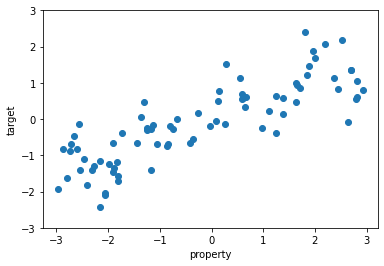

In [38]:
X, y = mglearn.datasets.make_wave(n_samples=80)     # n_samples옵션은 데이터 셈플의 갯수
plt.plot(X,y,'o')                                   # X[n,0]의 짝 y[n]
plt.ylim(-3, 3)                                     # y축 범위
plt.xlabel('property')
plt.ylabel('target')
# for i, v in enumerate(X):
#     plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
#              fontsize = 9, 
#              color='blue',
#              horizontalalignment='center',  # horizontalalignment (left, center, right)
#              verticalalignment='bottom')    # verticalalignment (top, center, bottom)

#### (1-3) `cancer` 데이터셋
- 인위적인 소규모 데이터셋 외에 `scikit-learn`에 들어 있는 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋(`cancer`)이다.
    - 각 종양은 양성과 악성으로 레이블되어 있고
    - 조직 데이터를 기반으로 종양이 악성인지를 예측할 수 있도록 학습하는 것이 과제이다.
  
  
- 이 데이터는 `scikit-learn`에 있는 `load_breast_cancer` 함수에서 로드하여 쓸 수 있다.

In [4]:
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()
print('cancer.keys():\n', cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
print('유방암 데이터의 형태 :', cancer.data.shape)

유방암 데이터의 형태 : (569, 30)


- 569개의 데이터 포인트를 가지고 있고 특성은 30개이다.

In [5]:
print('클래스별 샘플 개수 :', 
         {n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수 : {'malignant': 212, 'benign': 357}


- 앞서, `cancer.data`에서 569개의 유방암 데이터를 확인했다는 것을 염두하자


- `cancer.target`은 0과 1로 이루어진 배열을 가진 리스트이다.
- 이 객체에 `bincount()`함수를 적용하면 0과 1의 빈도 수를 반환한다.
- 각각 0은 악성종양, 1은 양성종양을 의미한다.
- 따라서, `np.bincount(cancer.target)`을 실행하면 `array([212, 357], dtype=int64)`가 반환된다. 즉, 0은 212개 1은 357개라는 의미이다.


- `cancer.target_names` maliganant(악성), benign(양성) value를 리스트 형태로 가지고있다.
- 따라서, `zip`함수를 이용하여 maliganant의 빈도 수와 benign의 빈도 수를 동시에 반환시킬 수 있다.


- 마지막으로, 리스트내포에서의 반복문을 이용하여 연결된 리스트들을 모두 반환하였다.
- 결론적으로, 출력물은 malignant(악성) 데이터 212개, benign(양성) 데이터 357개를 의미한다.

In [13]:
print('특성 이름:\n', cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


- 앞서, `cancer.data`에서 30개의 특성을 확인했다는 것을 염두하자


- `feature_names`속성을 확인하면 각 특성의 의미를 확인할 수 있다.

#### (1-4) `Boston Housing`데이터셋
- 회귀 분석용 실제 데이터셋으로 보스턴 주택가격 데이터셋 또한 사용된다.
- 이 데이터셋으로 할 작업은 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해  
1970년대 보스턴 주변의 주택 평균 가격을 예측하는 것이다.

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터 형태 : ', boston.data.shape)

데이터 형태 :  (506, 13)


- 총 506개의 데이터 포인트와 13개의 특성이 확인된다.

- 이 데이터셋에서는 13개의 입력 특성뿐 아니라 특성끼리 곱하여(즉 상호작용) 의도적으로 확장할 것이다.
- 즉 범죄율 / 고속도로 접근성의 개별 특성을 개별적으로 사용할 뿐만 아니라  
범죄율과 고속도로 접근성의 곱도 특성으로 생각한다는 의미이다.
- 이와 같이, 특성을 유도해내는 것을 `특성공학(feature engineering)`이라한다.


- 유도된 데이터셋은 `load_extended_boston` 함수를 사용하여 불러들일 수 있다.

In [16]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape : ', X.shape)

X.shape :  (506, 104)


- 원래 `Boston Housing` 데이터셋의 특성은 13개 였지만,  
13개에서 2개씩 (중복을 포함해) 짝지은 91개의 특성을 더해 총 104개가 된다.  
( (개별)13 + 13C2+(자기들끼리 짝지은 경우)13 )

#### (2) k-최근접 이웃

- `k-NN(k-Nearest Neighbors)`알고리즘
    - 참조 : https://jhryu1208.github.io/data/2020/10/17/INTRODUCTION/
    - 머신러닝 알고리즘 중에서 가장 간단
    - 단순 저장이 모델을 만드는 과정의 전부
    - 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 까운 데이터 포인트, 즉 `최근접 이웃`을 찾는다.
    

#### (2-1) k-최근접 이웃 분류

C:\Users\jhryu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


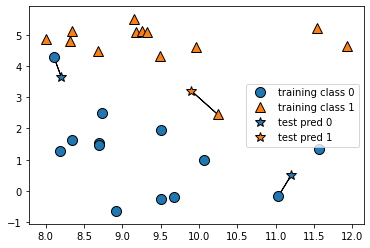

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- 위 그림에서 추가된 데이터 포인트는 3개이다. (별모양으로 표시됨)
- 그리고 추가한 각 데이터포인트에서 가장 가까운 훈련 데이터 포인트를 찾아서 해당 클래스로 라벨링되는 것을 확인할 수 있다.


- 위의 `1-최근접 이웃 모델`과 달리
- 좀 더 발전된 모델은 임의의 k개의 이웃을 고려하는 것이다.
- 하나 이상의 이웃 데이터 포인트를 고려할 때, 라벨링은 `투표`를 통해서 이루어진다.
- 즉, <u>가장 가까운 k개의 학습 데이터 포인터 중에서 더 많은 클래스를 따라서 시험 데이터가 라벨링된다는 의미이다.</u>

<br>

- 다음 모델은 forge 데이터셋에 대한 `3-최근접 이웃 모델`의 예측이다.
    
</br>

C:\Users\jhryu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


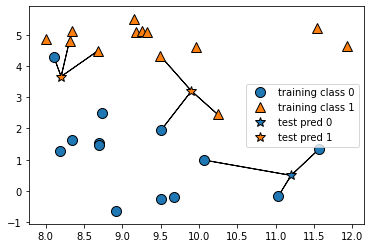

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

- 새 데이터 포인트 중 왼쪽 위의 것은 `n_neighbors = 1`일 때와 예측이 달라진 것을 알 수 있다.


- 위의 설명들은 모두 `이진 분류`에 대한 것이지만 `k-NN 알고리즘`은 `다중 분류`문제에도 사용할 수 있다.
- `다중 분류`에서는 <u>각 클래스에 얼마나 많은 이웃들이 속해 있는지를 세어서 그 결과를 예측</u>하게 된다.


<br>

- 다음으로, `scikit-learn`을 사용해서 `k-최근접 이웃 알고리즘`을 적용하는 방법에 관하여 살펴볼 것이다.
- 먼저 일반화 성능을 평가할 수 있도록 데이터를 `훈련 세트`와 `테스트 세트`로 나눈다.

</br>

In [23]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [24]:
# KNeighborsClassifier 객체 생성
# 이웃의 수 3
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

- 훈련 세트를 사용하여 분류 모델을 학습시킨다.
- 여기서(`KNeighborsClassifier`) 학습시킨다는 것은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것이다.

In [25]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- `predict` 메서드를 호출해서 예측한다.
- 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾는다.

In [26]:
print('테스트 세트 예측 :', clf.predict(X_test))

테스트 세트 예측 : [1 0 1 0 1 0 0]


- 모델이 얼마나 잘 일반화되었는지 평가하기 위해 `score` 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출한다.

In [29]:
print('테스트 세트 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


- [결과]
    - 이 모델의 정확도는 86% 이다.
    - 즉 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측하였다는 의미이다.

#### (2-2) `KNeighborsClassifier` 분석

- 2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그려볼 수 있다.
- 그리고 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠한다.
- 이렇게하면 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 `결정 경계(decision boundary)`를 확인할 수 있다.

<br>

- 다음 코드는 이웃이 하나, 셋, 아홉 개일 때의 `결정 경계`를 보여준다.

</br>

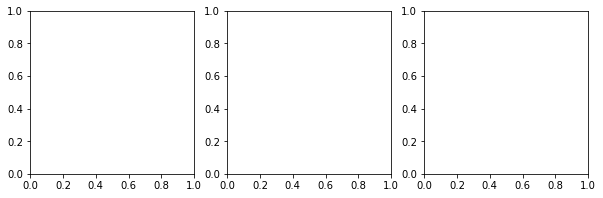

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize = (10, 3))

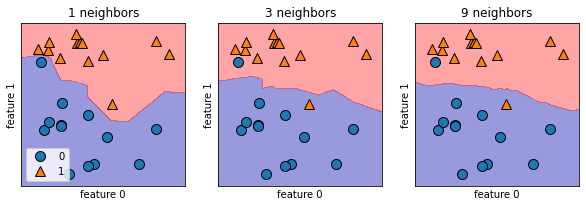

In [61]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax=ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    axes[0].legend(loc = 3)
plt.show()

- `n_neighbors = 1`일 때,  
모델링이 학습 데이터 셋에 가까운 결정 경계를 만들어낸다.  
즉, 학습 데이터 셋에 잘 맞는 복잡한 모델을 만든다는 것이다.


- `n_neighbors`가 증가할 수록 더 부드러운 결정 경계를 만든다.
- 이는 학습 데이터 셋과 조금 동떨어질 수 있는 단순한 모델을 만든다는 것이다.
- 다시 말해 <u>이웃을 적게하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도가 낮아진다.</u>

- 모델의 복잡도와 일반화 사이의 관계를 입증할 수 있는지 살펴볼 것이다.
    - 유방암 데이터셋이 이용된다.
    - 훈련 세트와 테스트 세트로 나누고, 이웃 수에 따라 평가한다.

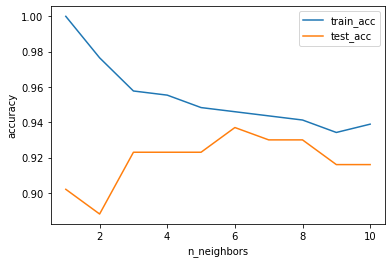

In [62]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="train_acc")
plt.plot(neighbors_settings, test_accuracy, label="test_acc")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

- `과대적합`과 `과소적합`의 특징을 확인할 수 있다.


- `과대적합` => 이웃의 수가 하나일 때는 
    - 훈련 데이터에 대한 예측이 완벽하다.
    - 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮다. (모델이 너무 복잡해진다)
    - 쉽게말하면, 훈련 데이터에서는 너무 복잡하기 때문에 A = A인 경우와 A != A+0.000000000000001 경우처럼 극단적인 판단 기준을 가진다.
        - 그래서 훈련 데이터의 경우 정확한 적중률을 보여주지만,
        - 테스트 데이터에서는 정확도가 낮아지는 것을 볼 수 있다.
    
    
- `과소적합` => 이웃의 수가 늘어나면 
    - 모델은 단순해지고 훈련 데이터의 정확도는 줄어든다.
    - 이웃의 수가 늘어나는 어느 순간부터 모델이 너무 단순해져서 정확도가 낮아진다.
    - 쉽게말하면, 훈련 데이터에 관해서는 모델이 너무 단순해서 A = A+1과 같이 판단 기준이 낮아진다.
        - 그래서 훈련 데이터의 경우 적중률이 매우 저조한 것을 볼 수 있다.


- <u>이렇게 머신러닝에서는 다양한 케이스에 대해서 체크하여  
최적의 모델 즉 위와같이 정확도가 가장 좋을 때인 중간 정도인 6개를 사용한 경우를 찾아야한다.</u>

#### (2-3) k - 최근접 이웃 회귀

- `k-최근접 알고리즘`은 `회귀 분석`에서도 사용된다.


- 다음 예제에서 wavve 데이터 셋을 이용해서 이웃이 하나인 최근접 이웃을 사용할 것이다.
- 최근접 점이 1개일때는 그냥 가장 가까운 데이터 포인트와 같은 값을 가지게 된다.

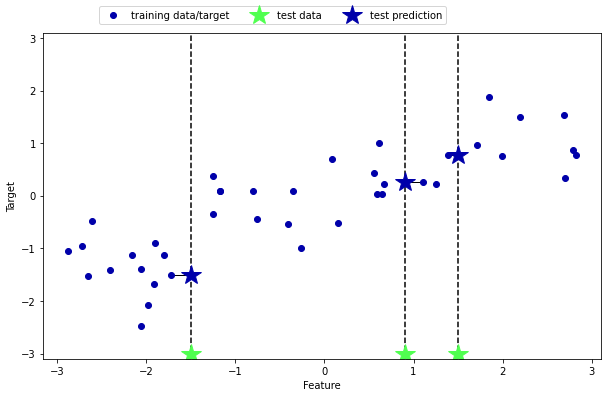

In [68]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

- 이 경우에서도 이웃을 둘 이상 사용하여 `회귀 분석`을 진행할 수 있다.
- 여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측된다.
    - 이웃이 1일때와 3일때의 target 위치를 비교하면 어떤 의미인지 쉽게 와닿는다.

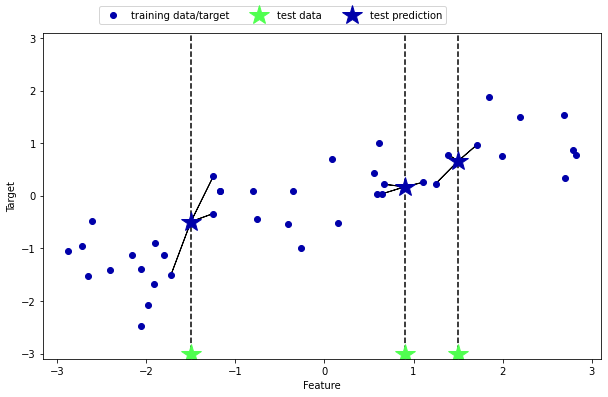

In [69]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

- `scikit-learn`에서 `회귀`를 위한 `k-최근접 이웃 알고리즘`은 `KNeighborsRegressor`에 구현되어있다.

In [73]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors = 3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다.
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [79]:
print('테스트 세트 예측:\n', reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


- 역시 `score`메서드를 사용해 모델을 평가할 수 있다.
- `score`메서드는 `회귀`일 땐 `결정계수(coefficient of determination)`인 `R^2`값을 반환한다.
    - 0과 1사이의 값이 된다.
    - 1의 경우는 완벽한 예측이고, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우이다.
    - 예측과 타깃이 상반된 경향을 가지는 경우 음수의 값을 가질 수 있다.
    - 결정계수의 식은 아래와 같다. y는 타깃값,  y-는 타깃 값의 평균값, y^는 모델의 예측값이다.
        - R^2 = (1−∑(y−y^)^2) / (∑(y−y¯)^2)

In [81]:
print('테스트 세트 R^2 : {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R^2 : 0.83


#### (2-4) `KNeighborsRegressor` 분석

- 1차원 데이터 셋에 대해 예측이 어떤식으로 이루어지는지 시각화 할 수 있다.
    - 이를 위해 x축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만든다.

In [87]:
X, y = mglearn.datasets.make_wave(n_samples=40)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

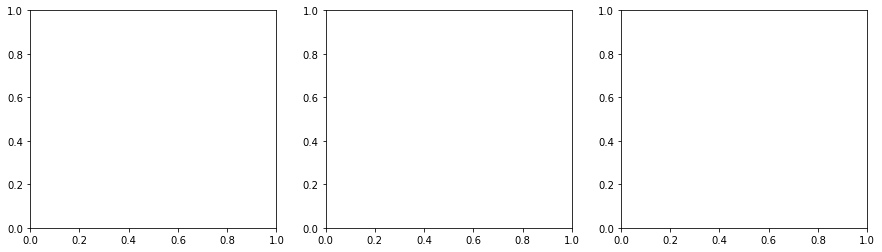

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# linsapce 함수는 파이썬의 numpy 모듈에 포함된 함수로써
# 1차원의 배열 만들기,
# 그래프에서 수평축의 간격 만들기 등에 매우 편리하게 사용할 수 있는 함수이다.
# 아래 같은 경우는 -3부터 3까지 1000개의 데이터 포인트를 만든다.
# reshape 함수의 경우 다음 링크 참조 https://rfriend.tistory.com/345
# reshape의 결과로 [-3, ... , 3]까지의 1차원 배열이 1000행 1열의 형태로 바뀌엇다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

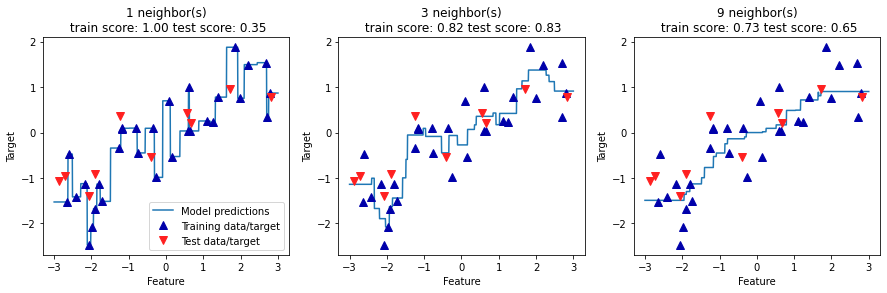

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)


from sklearn.neighbors import KNeighborsRegressor
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    

    ax.set_title(
                    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
                        n_neighbors, reg.score(X_train, y_train),
                        reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

plt.show()

- 위 그림에서 볼 수 있듯이 
<u>이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나간다. 하지만, 이는 매우 불안정한 예측을 만들어낸다.  
이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 안정된 예측을 얻게 된다.</u>   (이웃 3,9개의 경우가 1개의 경우보다 score가 높음)

#### (2-5) 장단점과 매개변수
- `k-NN 알고리즘`의 장점
    - 알고리즘의 이해가 쉬우면서도 별다른 조정 없이도 합리적인 성능을 보여준다.
    - 복잡한 머신 러닝 테크닉을 사용하기 이전에 기본적으로 사용해볼만한 알고리즘으로 모델 구축이 매우 빠르다는 측면도 장점으로 작용한다.
    

- `k-NN 알고리즘`의 단점
    - 특성의 수 또는 데이터 포인트가 많아지면(즉 훈련 세트가 매우 많으면) 예측이 느려진다.
    - 특성 값 대부분이 0인 (즉 희소한) 데이터셋과는 특히 잘 작동하지 않는다.
    - `k-최근접 이웃 알고리즘`이 이해하긴 쉽지만, 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않는다.
        - <u>이런 단점이 없는 알고리즘이 다음에 설명될 `선형 모델`이다.</u>